In [56]:
# seaborn 라이브러리 설치
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Start where we finished in the last lesson, with data imported and filtered.

In [57]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# "wifi.csv" 파일 읽기
df = pd.read_csv("./wifi.csv")

# 데이터프레임의 처음 5개 행 출력
df.head()


,cname,line,name,dae,plat,count
0,SKT,1,다대포해수욕장,6,6,12
1,SKT,1,다대포항,4,6,10
2,SKT,1,낫개,2,4,6
3,SKT,1,신장림,2,6,8
4,SKT,1,장림,3,6,9


In [58]:
# 데이터프레임의 처음 5개 행 출력
df.head()

,cname,line,name,dae,plat,count
0,SKT,1,다대포해수욕장,6,6,12
1,SKT,1,다대포항,4,6,10
2,SKT,1,낫개,2,4,6
3,SKT,1,신장림,2,6,8
4,SKT,1,장림,3,6,9


<Axes: xlabel='count'>

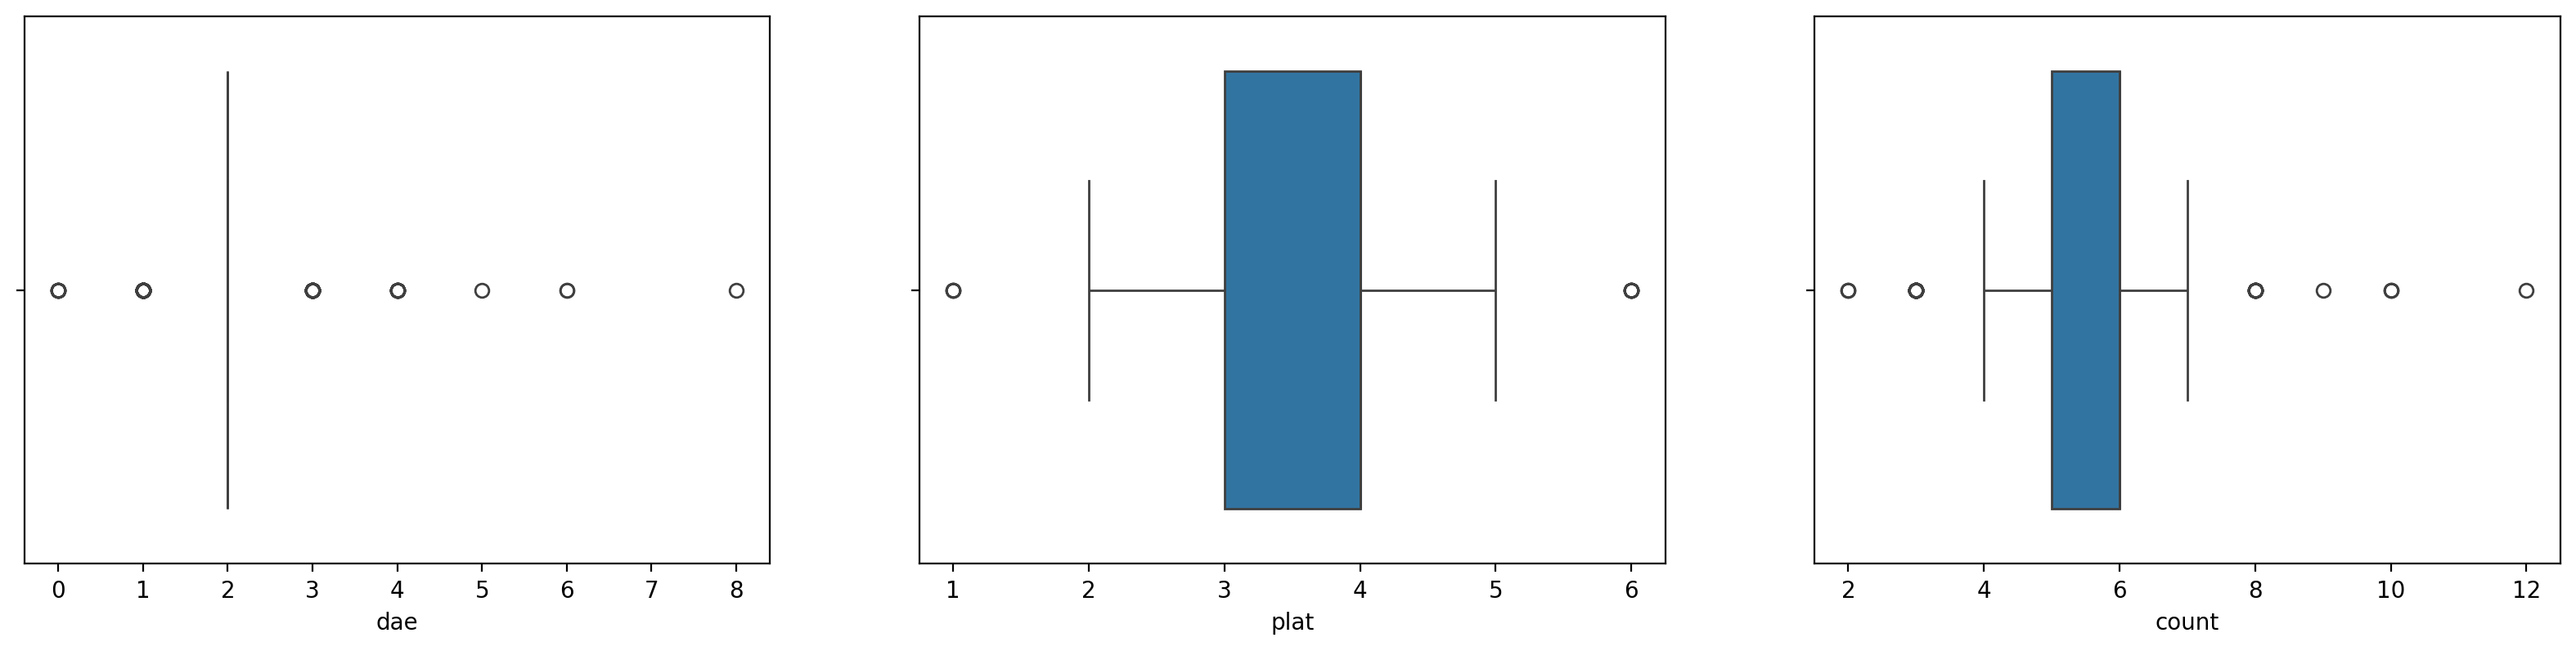

In [59]:
# 그래프의 전체 크기와 해상도 설정
plt.figure(figsize=(20,20), dpi=200)

# 첫 번째 subplot: 'dae' 열에 대한 boxplot
plt.subplot(4,3,1)
sns.boxplot(x='dae', data=df)

# 두 번째 subplot: 'plat' 열에 대한 boxplot
plt.subplot(4,3,2)
sns.boxplot(x='plat', data=df)

# 세 번째 subplot: 'count' 열에 대한 boxplot
plt.subplot(4,3,3)
sns.boxplot(x='count', data=df)


In [60]:
# 필요한 라이브러리 임포트
from sklearn.preprocessing import LabelEncoder, StandardScaler

# LabelEncoder 객체 생성
le = LabelEncoder()

# 입력 변수(X)와 출력 변수(y) 설정
X = df.loc[:, ('line', 'dae', 'plat', 'count')]
y = df['line']

# 'line' 열에 대해 Label Encoding 적용
X['line'] = le.fit_transform(X['line'])
y = le.transform(y)


In [61]:
# KMeans 클러스터링 알고리즘 임포트
from sklearn.cluster import KMeans

# 클러스터 수와 랜덤 시드 설정
nclusters = 3 
seed = 0

# KMeans 모델 생성 및 훈련
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# 각 데이터 포인트의 클러스터 예측
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans


array([2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0,

You see an array printed out with predicted clusters (0, 1,or 2) for each row of the dataframe.

Those numbers don't mean much to us, so let's get a 'silhouette score' to see the accuracy. Our score is in the middle.

In [62]:
# sklearn.metrics 모듈 임포트
from sklearn import metrics

# Silhouette Score 계산
score = metrics.silhouette_score(X, y_cluster_kmeans)
score


0.5131881408994292

In [63]:
# KMeans 클러스터링 알고리즘 임포트
from sklearn.cluster import KMeans

# Within-Cluster-Sum-of-Squares (WCSS)를 저장할 빈 리스트 생성
wcss = []

# 클러스터 수를 1부터 10까지 변화시키면서 WCSS 계산
for i in range(1, 11):
    # KMeans 객체 생성 및 훈련
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
   


KeyError: 'y'

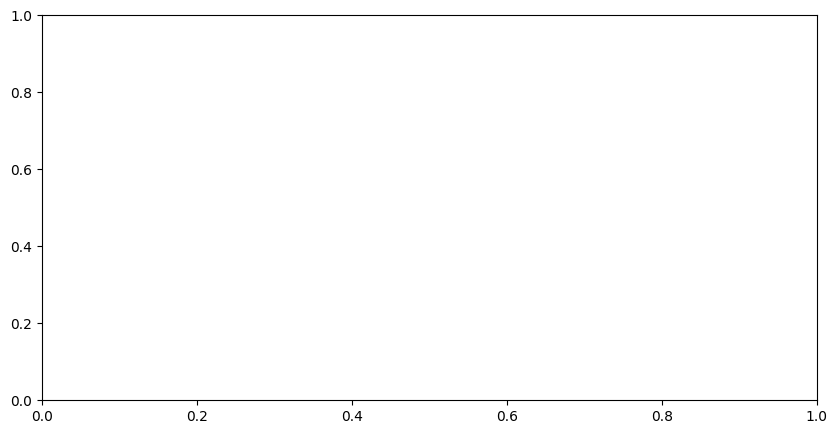

In [64]:
# 그래프의 크기 설정
plt.figure(figsize=(10,5))

# Elbow Method를 통한 클러스터 수 선택을 위한 그래프 그리기
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')

# 그래프 제목, x축 및 y축 라벨 설정
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# 그래프 출력
plt.show()


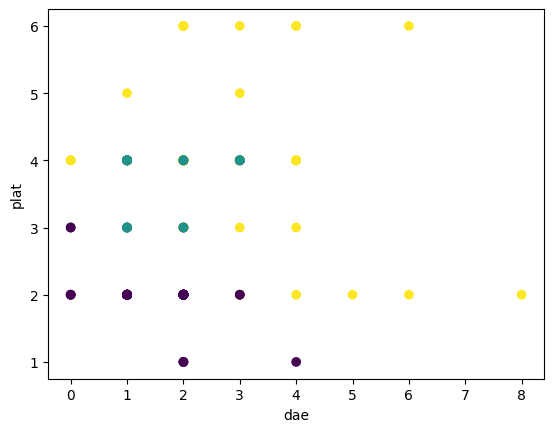

In [ ]:
# KMeans 클러스터링 알고리즘 임포트
from sklearn.cluster import KMeans

# KMeans 모델 생성 및 훈련
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# 각 데이터 포인트의 클러스터 레이블 예측
labels = kmeans.predict(X)

# Scatter plot 그리기
plt.scatter(df['dae'], df['plat'], c=labels)

# x축 및 y축 라벨 설정
plt.xlabel('dae')
plt.ylabel('plat')

# 그래프 출력
plt.show()


In [ ]:
# KMeans 모델에서 클러스터 레이블 가져오기
labels = kmeans.labels_

# 실제 레이블과 예측된 레이블이 일치하는지 확인
correct_labels = sum(y == labels)

# 정확도 출력
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels / float(y.size)))


Result: 11 out of 336 samples were correctly labeled.
Accuracy score: 0.03


생각보다 데이터의 양이 적어서 스코어가 너무 적게나온거같아서 아쉬움이 좀 있었습니다.